Этот проект небольшой по объему, но по пониманию некоторых вещей (да и просто задания) сложнее многих объемных. При выполнении смотрел в тренажер и впервые смотрел в каналы в слаке (т.к. некоторые вещи в задании базово не понял). В итоге кажется, что понимание появилось по ходу выполнения (хотя возможно совершил какие-то принципиальные ошибки), ну и результат выглядит немного странно, как и вобщем данные по второму региону.

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Исходные данные
Данные геологоразведки трёх регионов находятся в трех файлах.
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

# Схема исследования
- [Шаг 1. Загрузка и подготовка данных](#step_1)
- [Шаг 2. Обучение и проверка модели](#step_2)
- [Шаг 3. Подготовка к расчёту прибыли](#step_3)
- [Шаг 4. Расчёт прибыли и рисков](#step_4)

Инструкция по выполнению проекта
1.	Загрузите и подготовьте данные. Поясните порядок действий.
2.	Обучите и проверьте модель для каждого региона:
- Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
- Обучите модель и сделайте предсказания на валидационной выборке.
- Сохраните предсказания и правильные ответы на валидационной выборке.
- Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
- Проанализируйте результаты.
3.	Подготовьтесь к расчёту прибыли:
- Все ключевые значения для расчётов сохраните в отдельных переменных.
- Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
- Напишите выводы по этапу подготовки расчёта прибыли.
4.	Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- Выберите скважины с максимальными значениями предсказаний.
- Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитайте прибыль для полученного объёма сырья.
5.	Посчитайте риски и прибыль для каждого региона:
- Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.


<a id='step_1'></a>
## Загрузка и подготовка данных

In [1]:
# ячейка импорта
import pandas as pd
import matplotlib.pyplot as plt  # для построения графиков
import seaborn as sns            # для построения графиков
import warnings                  # добавил чтобы убирать предупреждения


from sklearn.preprocessing import OrdinalEncoder     # для преобразование категориальных признаков в численные
from sklearn.preprocessing import StandardScaler     # для масштабирования
from sklearn.model_selection import train_test_split  # для разбиения на выборки

# модели
from sklearn.tree import DecisionTreeClassifier      # модель решающего дерева
from sklearn.ensemble import RandomForestClassifier  # модель случайного леса
from sklearn.linear_model import LogisticRegression  # модель логистической регрессии
from sklearn.neighbors import KNeighborsClassifier    # модель k-ближайших соседей

# модели
from sklearn.linear_model import LinearRegression   # модель линейной регрессии
from sklearn.ensemble import RandomForestRegressor  # на всякий случай 
from sklearn.tree import DecisionTreeRegressor      # на всякий случай 
from sklearn.metrics import mean_squared_error      # для расчета MSE


from sklearn.model_selection import GridSearchCV   # для того чтобы попробовать применить GridSearchCV
import numpy as np                                 # для того чтобы попробовать перебрать пороги вероятностей


pd.options.display.float_format = '{:,.2f}'.format  # форматирование числа разрядов после запятой 

In [ ]:
# открытие файла (на случай если буду открывать вне тренажера, прописал альтернативный путь)
try:
    data0 = pd.read_csv('/datasets/geo_data_0.csv')
    data1 = pd.read_csv('/datasets/geo_data_1.csv')
    data2 = pd.read_csv('/datasets/geo_data_2.csv')
    
except:
    data_path = 'C:/Users/v.kozlovskiy/Desktop/LRN_on_desk/10/'
    data = pd.read_csv(data_path + 'Churn.csv')
    data0 = pd.read_csv(data_path + 'geo_data_0.csv')
    data1 = pd.read_csv(data_path + 'geo_data_1.csv')
    data2 = pd.read_csv(data_path + 'geo_data_2.csv')
    

In [3]:
datas = [data0, data1, data2]

In [4]:
print([i.info() for i in datas])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

датасеты похожи, пропусков нет

In [5]:
display([i.head() for i in datas])

[      id    f0    f1   f2  product
 0  txEyH  0.71 -0.50 1.22   105.28
 1  2acmU  1.33 -0.34 4.37    73.04
 2  409Wp  1.02  0.15 1.42    85.27
 3  iJLyR -0.03  0.14 2.98   168.62
 4  Xdl7t  1.99  0.16 4.75   154.04,
       id     f0     f1    f2  product
 0  kBEdx -15.00  -8.28 -0.01     3.18
 1  62mP7  14.27  -3.48  1.00    26.95
 2  vyE1P   6.26  -5.95  5.00   134.77
 3  KcrkZ -13.08 -11.51  5.00   137.95
 4  AHL4O  12.70  -8.15  5.00   134.77,
       id    f0    f1    f2  product
 0  fwXo0 -1.15  0.96 -0.83    27.76
 1  WJtFt  0.26  0.27 -2.53    56.07
 2  ovLUW  0.19  0.29 -5.59    62.87
 3  q6cA6  2.24 -0.55  0.93   114.57
 4  WPMUX -0.52  1.72  5.90   149.60]

скорее всего столбец id не пригодится, исходя из контекста столбец product должен стать целевым признаком
посмотрю методом describe()

In [6]:
display([i.describe() for i in datas])

[              f0         f1         f2    product
 count 100,000.00 100,000.00 100,000.00 100,000.00
 mean        0.50       0.25       2.50      92.50
 std         0.87       0.50       3.25      44.29
 min        -1.41      -0.85     -12.09       0.00
 25%        -0.07      -0.20       0.29      56.50
 50%         0.50       0.25       2.52      91.85
 75%         1.07       0.70       4.72     128.56
 max         2.36       1.34      16.00     185.36,
               f0         f1         f2    product
 count 100,000.00 100,000.00 100,000.00 100,000.00
 mean        1.14      -4.80       2.49      68.83
 std         8.97       5.12       1.70      45.94
 min       -31.61     -26.36      -0.02       0.00
 25%        -6.30      -8.27       1.00      26.95
 50%         1.15      -4.81       2.01      57.09
 75%         8.62      -1.33       4.00     107.81
 max        29.42      18.73       5.02     137.95,
               f0         f1         f2    product
 count 100,000.00 100,000.00 

показатели для первого и третьего региона сходны, для второго заметно меньше, применю метод describe для object 

In [7]:
display([i.describe(include=['object']) for i in datas]) 

[            id
 count   100000
 unique   99990
 top      74z30
 freq         2,
             id
 count   100000
 unique   99996
 top      wt4Uk
 freq         2,
             id
 count   100000
 unique   99996
 top      Vcm5J
 freq         2]

видно, что несколько раз id дублируется - посмотрю сколько

In [8]:
display([i['id'].value_counts().sort_values(ascending=False).head(11) for i in datas]) 

[74z30    2
 Tdehs    2
 QcMuo    2
 bxg6G    2
 bsk9y    2
 HZww2    2
 A5aEY    2
 TtcGQ    2
 fiKDv    2
 AGS9W    2
 SwYDu    1
 Name: id, dtype: int64,
 wt4Uk    2
 5ltQ6    2
 LHZR0    2
 bfPNe    2
 9zMrI    1
 PFRhC    1
 HNvJY    1
 9Wtrh    1
 2wQbN    1
 ZozSR    1
 6nRks    1
 Name: id, dtype: int64,
 Vcm5J    2
 xCHr8    2
 KUPhW    2
 VF7Jo    2
 U51DY    1
 h6mKL    1
 436wJ    1
 F15bq    1
 eCeoH    1
 hKIqg    1
 M8fR4    1
 Name: id, dtype: int64]

может быть признаком дубликатов - проверю

In [9]:
display([i.duplicated().sum() for i in datas]) 

[0, 0, 0]

дубликатов нет, посмотю на матрицу корреляций

In [10]:
display([i.corr() for i in datas])

[           f0    f1    f2  product
 f0       1.00 -0.44 -0.00     0.14
 f1      -0.44  1.00  0.00    -0.19
 f2      -0.00  0.00  1.00     0.48
 product  0.14 -0.19  0.48     1.00,
            f0    f1    f2  product
 f0       1.00  0.18 -0.00    -0.03
 f1       0.18  1.00 -0.00    -0.01
 f2      -0.00 -0.00  1.00     1.00
 product -0.03 -0.01  1.00     1.00,
            f0    f1    f2  product
 f0       1.00  0.00 -0.00    -0.00
 f1       0.00  1.00  0.00    -0.00
 f2      -0.00  0.00  1.00     0.45
 product -0.00 -0.00  0.45     1.00]

видна почти полная корреляция между столбцом f2 и product (целевым признаком) во втором регионе
посмотрю на распредеелние значений целевого признака в регионах:

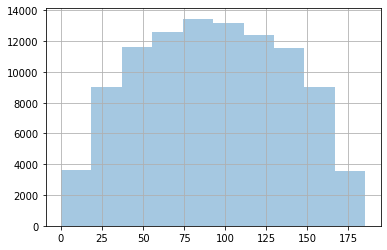

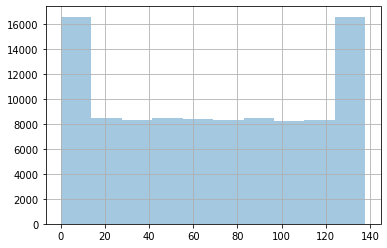

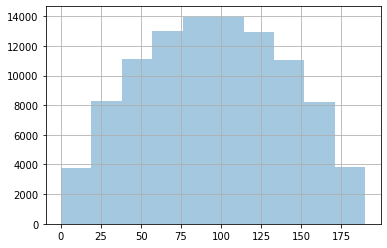

In [11]:
for i in datas:
    i['product'].hist(alpha=0.4) 
    plt.show() 

первый и треитй регион выглядят нормально распределенными (причем в сходных границах) - чего не нельзя сказать про второй (отличаются как границы, так и само распределние не нормальное - много минимальных и максимальных значений, остальные на одном уровне)

на предыдущем семинаре обсуждали способы масштабирования и способы проверки нормальности распределения - решил его попробовать (хотя не уверен, что он здесь особо нужен - но результат показался интересным)

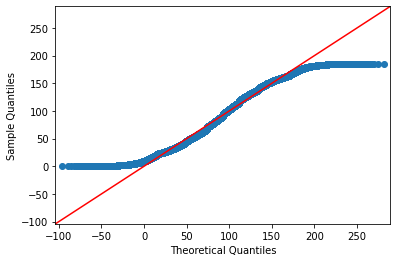

In [12]:
import statsmodels.api as sm
fig = sm.qqplot(data0['product'], loc=data0['product'].mean(), scale=data0['product'].std(), line='45')

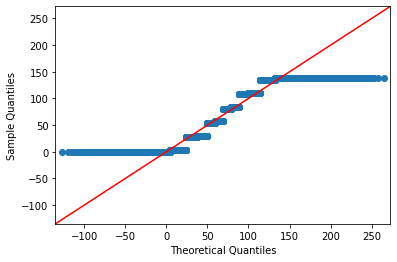

In [13]:
fig = sm.qqplot(data1['product'], loc=data1['product'].mean(), scale=data1['product'].std(), line='45')

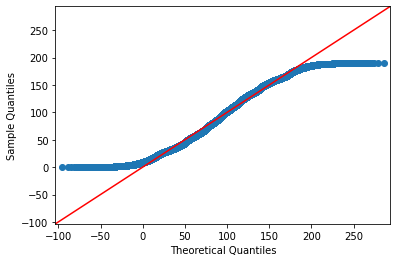

In [14]:
fig = sm.qqplot(data2['product'], loc=data2['product'].mean(), scale=data2['product'].std(), line='45')

в общем как я понял у всех распределений есть отклонения от нормальности (хвосты отклоняются от середины - хотя судя по гистограммам я бы так не сказал), но опять сильно выделятся 2-ой регион (data1) решил посмотреть гистограмму с большим числом корзин

<AxesSubplot:>

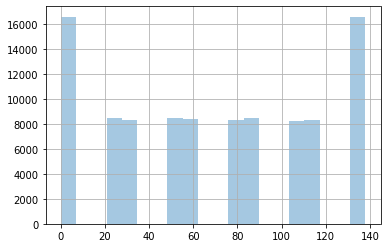

In [15]:
data1['product'].hist(bins=20, alpha=0.4)

во втором регионе данные не просто не нормально распределены, но еще и разбиты на 6 групп

**Вывод по шагу**
- Данные из первого и третьего региона выглядят сходно - значения целвого признака нормально распределены.
- Данные из второго региона отличаются (целевой признак меньше по средним показателям), целевой признак скоррелирован с одним из других и распределен не нормально (его значения разбиты на 6 групп, при том значения минимальной и максимальной встречаются в 2 раза чаще, чем других, а у других групп значения примерно одинаковы)
- Пропусков нет, дубликатов нет (хотя есть несколько дублирований id - до 10 на 100000, но не думаю, что это имеет значение)


<a id='step_2'></a>
## Обучение и проверка модели

In [16]:
def train_and_check(data):
    # разбиение на подвыборки
    features = data.drop(['product', 'id'], axis=1) # подготовка данных с признакми
    target = data['product']                        # выделение целевого признака

    features_train, features_test, target_train, target_test = train_test_split(        # разделение тестовой и обучающей выборки 
        features, target, test_size=0.25, random_state=12345)
    
    # обучение моделей и создание предсказаний
    model = LinearRegression() # инициализация модели
    model.fit(features_train, target_train) # обучение модели на тренировочной выборке
    predictions_test = model.predict(features_test) # предсказания модели на тестовой выборке
    
    # cредний запас предсказанного сырья и RMSE моделей
    rmse = mean_squared_error(target_test, predictions_test)**0.5 # п RMSE 
    print('Средний запас предсказанного сырья для региона:', predictions_test.mean())
    print('RMSE модели линейной регрессии на тестовой выборке для региона:', rmse)
    
    predictions_test = pd.Series(predictions_test)  # добавил этот этап сюда - все равно он нужен дальше + без него у меня не получалось нормально вернуть результат
    # возврат тех данных, которые потребуются в дальнейшей работе
    return target_test, predictions_test
    


### Работа с данными по первому региону

In [17]:
target_test0, predictions_test0 = train_and_check(data0)

Средний запас предсказанного сырья для региона: 92.59256778438035
RMSE модели линейной регрессии на тестовой выборке для региона: 37.5794217150813


### Работа с данными по второму региону

In [18]:
target_test1, predictions_test1 = train_and_check(data1)

Средний запас предсказанного сырья для региона: 68.728546895446
RMSE модели линейной регрессии на тестовой выборке для региона: 0.893099286775617


### Работа с данными по третьему региону

In [19]:
target_test2, predictions_test2 = train_and_check(data2)

Средний запас предсказанного сырья для региона: 94.96504596800489
RMSE модели линейной регрессии на тестовой выборке для региона: 40.02970873393434


в задании указано, что использовать надо только линейную регрессию (исходя из того что читал, хотя это поверхностно понял, что в её случае настройка гиперпараметров не особо поможет - изначально думал использовать GridSearchCV)
на всякий случай в ячейке импорта оставил и другие варианты регрессий, но дальше буду использовать только линейную без гиперпараметров (если потребуется буду корректировать)

In [20]:
# выведу результатаы в таблице
table = pd.DataFrame(data=[[92.59, 37.58],  [68.72, 0.89], [94.97, 40.03]], 
                     columns=['Средний запас', 'RMSE'])
table.index = ['Регион 1', 'Регион 2', 'Регион 3',]
display(table)

,Средний запас,RMSE
Регион 1,92.59,37.58
Регион 2,68.72,0.89
Регион 3,94.97,40.03


Средний запас во втором регионе ниже, при этом RMSE там близка к 0 - это ожидаемо, с учетом того, что признак f2 там почти полностью коррелирует с целевым. Посмотрю на гистограмме распределение признака f2 для каждого из регионов

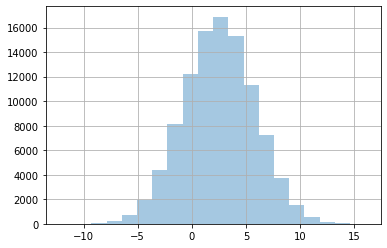

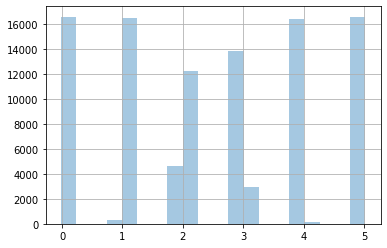

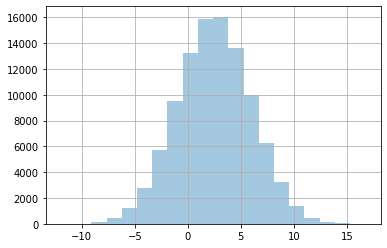

In [21]:
for i in datas:
    i['f2'].hist(bins= 20, alpha=0.4) 
    plt.show() 

в первом и третьем регионе распределение f2 похоже на нормальное во втором, как и product разделен на 6 групп (хотя это соотношение между группами не совсем такое же как у product, но почти полная корреляция).

На предыдущем семинаре шла речь про отбор признаков - т.к. здесь их немного и я решил посмотреть на комбинации всех признаков для всех регионов в построении моделей, получении предсказаний и подсчета rmse.

In [22]:
features_comb = [['f0'], ['f1'], ['f2'], ['f0', 'f1'], ['f0', 'f2'], ['f1', 'f2'], ['f0', 'f1', 'f2']] # список с комбинациями признаков
product_list = [] # список для средних запасов
rmse_list = []    # список для rmse
counter = 0       # переменная для того чтобы выводить в тексте нужный регион
region = ''
region_list = []    # список для регионов
for i in datas:           # цикл по регионам
    if counter == 2:
        region = 'Регион 3'
    if counter == 1:
        region = 'Регион 2'
        counter += 1
    if counter == 0:
        region = 'Регион 1'
        counter += 1
     
        
    for x in features_comb:    # цикл по комбинациям признаков
        features_c = i[x]
        target_c = i['product']
        
        features_train_c, features_test_c, target_train_c, target_test_c = train_test_split(        # разделение тестовой и обучающей выборки 
            features_c, target_c, test_size=0.25, random_state=12345)


        model_c = LinearRegression() # инициализация модели
        model_c.fit(features_train_c, target_train_c) # обучение модели на тренировочной выборке
        predictions_test_c = model_c.predict(features_test_c) # предсказания модели на тестовой выборке


        rmse_c = mean_squared_error(target_test_c, predictions_test_c)**0.5 #  RMSE         
        product_list.append(predictions_test_c.mean())
        rmse_list.append(rmse_c)
        region_list.append(region) 

table = pd.DataFrame(data=[region_list, features_comb * 3, product_list, rmse_list],    # таблица для представления результатов
                     index=['Регион', 'Комбинация признаков', 'Средний запас', 'RMSE'])
table = table.T
display(table.sort_values(by='RMSE'))


,Регион,Комбинация признаков,Средний запас,RMSE
13,Регион 2,"[f0, f1, f2]",68.73,0.89
11,Регион 2,"[f0, f2]",68.73,0.90
12,Регион 2,"[f1, f2]",68.73,1.56
9,Регион 2,[f2],68.73,1.59
6,Регион 1,"[f0, f1, f2]",92.59,37.58
5,Регион 1,"[f1, f2]",92.55,37.73
4,Регион 1,"[f0, f2]",92.64,38.12
2,Регион 1,[f2],92.55,38.73
16,Регион 3,[f2],94.97,40.03
19,Регион 3,"[f1, f2]",94.97,40.03


предсказания запасов модели по разным комбинациям признаков дают примерно одинаковые (для каждого региона)
- видно что для первого региона rmse ниже всего когда используются все три признака,
- для третьего значения rmse примерно одинаковы (но когда в числе признаков есть f2) обычно ниже
- для второго региона самая низкая rmse наблюдается если использованы все три признака (но все низкие - близкие к 0 значения видны при использовании f2). при этом после удаления f2 rmse становится самой высокой.

**Вывод по шагу**
Также как и раньше видны аномалии в случае 2-го региона, в то же время удалять f2, наверное не стоит, т.к. хотя модель почти полностью работает на этом признаке, и он выглядит странно - это не выглядит основанием для удаления.
вообще мне кажется, что данные по 2-му региону выглядят малореалистично

<a id='step_3'></a>
## Подготовка к расчёту прибыли

**достаточный объём сырья для безубыточной разработки новой скважины**

на регион выделяют 10 000 000 000 для того чтобы разработать 200 скважин. Стоимость 450 рублей. Единицы объема сырья - тысяча баррелей. (Насколько я помню константы надо писать заглавными буквами)

In [23]:
REGION_BUDGET = 10000000000
WELL_PRICE = REGION_BUDGET / 200
MIL_BARREL = 450000
print('Стоимость разработки скважины:', WELL_PRICE)

Стоимость разработки скважины: 50000000.0


In [24]:
# граница ниже, которой разработка не будет безубыточной
WELL_PRODUCT_LIMIT = WELL_PRICE / MIL_BARREL
print('Граница ниже, которой разработка не будет безубыточной:', WELL_PRODUCT_LIMIT)

Граница ниже, которой разработка не будет безубыточной: 111.11111111111111


In [25]:
print('Средний объем в первом регионе:', data0['product'].mean()) 
print('Средний объем во втором регионе:', data1['product'].mean()) 
print('Средний объем в третьем регионе:', data2['product'].mean()) 

Средний объем в первом регионе: 92.50000000000001
Средний объем во втором регионе: 68.82500000000002
Средний объем в третьем регионе: 95.00000000000004


**вывод по этапу подготовки расчёта прибыли**

разработку скважины имеет смысл начинать если объем сырья в ней больше, чем 111,(1)
Средний объем сырья во всех регионах (особенно во втором) ниже этой цифры

<a id='step_4'></a>
## Расчёт прибыли и рисков 

Фунция для расчета прибыли - самый сложный момент для моего понимания исходя из понимания задания и в целом (смотрел в тренажер, в задание, и в слак и вроде бы пришел к пониманию, что надо сделать)

- 4.1. Выберите скважины с максимальными значениями предсказаний.
- 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- 4.3. Рассчитайте прибыль для полученного объёма сырья.

Сначала идет сортировка предсказанных значений сырья по убыванию (их еще надо перевести в Series)  
Затем обновление индексов в целевых значениях (т.к. их индексы перемешаны после разделения на выборки и не соответствовали индексам, которые появяться у предсказанных значений) - как я понимаю для локальной задачи нам нужно соответстие значений предсказанных и целевых признаков (но в случае предсказанных индексов нет т.к. данные еще не в виде Series, а в случае целевых индексы перемешаны - но фактически (по расположению в столбце) значения соответствуют друг другу) 

In [26]:
# функция для расчета прибыли
def profit(target, pred, wells):
    
    pred_sorted = pred.sort_values(ascending=False)  # перевод сортировка по убыванию (в Series перевел раньше)
    target = target.reset_index(drop=True)                      # сброс старых индексов целевых значений
    select = target[pred_sorted.index][:wells]                # выбор целвых значений соответствующих отсортированным предсказанным - и выбор count первых из них

    return select.sum() * MIL_BARREL - REGION_BUDGET    # подсчет суммарного объема для count скважин, их умножение на стоимость тысячи бареллей и вычитание из этой суммы бюджета на разработку в регионе


In [27]:
print(f'Доход по предсказаниям для 200 наиболее прибыльных скважин в первом регионе: {profit(target_test0, predictions_test0, 200):.2f}')

Доход по предсказаниям для 200 наиболее прибыльных скважин в первом регионе: 3320826043.14


In [28]:
print(f'Доход по предсказаниям для 200 наиболее прибыльных скважин во втором регионе: {profit(target_test1, predictions_test1, 200):.2f}')

Доход по предсказаниям для 200 наиболее прибыльных скважин во втором регионе: 2415086696.68


In [29]:
print(f'Доход по предсказаниям для 200 наиболее прибыльных скважин в третьем регионе: {profit(target_test2, predictions_test2, 200):.2f}')

Доход по предсказаниям для 200 наиболее прибыльных скважин в третьем регионе: 2710349963.60


При таком рассмотрении прибыльными получаются все регионы: самым прибыльным первый, наименее прибыльным - второй

**Бутстреп**

Думаю, что если правильно понял подход с функцией, то применение bootstrap получится сделать верно

In [30]:
state = np.random.RandomState(12345) # фиксируется случайность

In [31]:
def bootstrap(target, predictions, explore, wells):
    values = []   # список для значений

    for i in range(1000):  # цикл для тысячи итераций
    
        # ниже выбор случайной подвыборки (исходя из того что в разработку идут 500 скважин)
        prediction_subsample = pd.Series(predictions).sample(n=explore, replace=True, random_state=state)
    
        # применение функции
        result = profit(target, prediction_subsample, wells)
        values.append(result)
    
    values = pd.Series(values)       # перевод списка с результатами в Series
    lower = values.quantile(0.025)    # определение нижней границы доверительного интервала
    upper = values.quantile(0.0975)   # определение верхней границы доверительного интервала

    mean = values.mean()          # определение средней прибыли по итогам bootstrap
    values.hist()                 # гистограмма значений прибыли по итогам bootstrap
    risk = (values < 0).mean()

    print(f'Средняя прибыль: {mean:.2f}')
    print(f'97.5%-квантиль: {upper:.2f}')
    print(f'2.5%-квантиль: {lower:.2f}')
    print(f'Риск убытков: {risk:.2%}')
    return mean, lower, upper, risk

### работа с данными по первому региону

Средняя прибыль: 396164984.80
97.5%-квантиль: 53834549.79
2.5%-квантиль: -111215545.89
Риск убытков: 6.90%


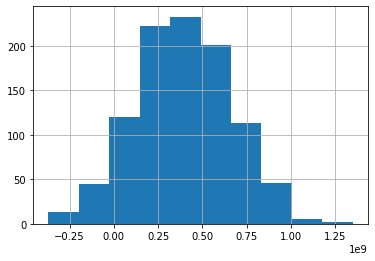

In [32]:
mean0, lower0, upper0, risk0 = bootstrap(target_test0, predictions_test0, 500, 200)

### работа с данными по второму региону

Средняя прибыль: 461155817.28
97.5%-квантиль: 212855420.64
2.5%-квантиль: 78050810.75
Риск убытков: 0.70%


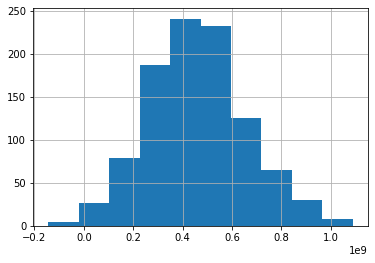

In [33]:
mean1, lower1, upper1, risk1 = bootstrap(target_test1, predictions_test1, 500, 200)

### работа с данными по третьему региону

Средняя прибыль: 392950475.17
97.5%-квантиль: 54436533.11
2.5%-квантиль: -112227625.38
Риск убытков: 6.50%


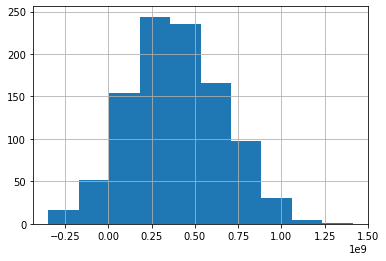

In [34]:
mean2, lower2, upper2, risk2 = bootstrap(target_test2, predictions_test2, 500, 200)

In [35]:

table = pd.DataFrame(data=[['Регион 1', mean0, lower0, upper0, risk0], 
                           ['Регион 2', mean1, lower1, upper1, risk1], 
                           ['Регион 3', mean2, lower2, upper2, risk2]],    # таблица для представления результатов
                     columns=['Регион', 'Средняя прибыль после bootsrap', 'Нижняя граница дов.интервала', 'Верхняя граница дов.интервала', 'Риск убытков'])
table

,Регион,Средняя прибыль после bootsrap,Нижняя граница дов.интервала,Верхняя граница дов.интервала,Риск убытков
0,Регион 1,"396,164,984.80","-111,215,545.89","53,834,549.79",0.07
1,Регион 2,"461,155,817.28","78,050,810.75","212,855,420.64",0.01
2,Регион 3,"392,950,475.17","-112,227,625.38","54,436,533.11",0.07


**Вывод по расчету прибыли и рисков**  
В ходе bootstrap и подсчета риска убытков первый и третий регион опять дают сходные результаты
при этом наилучшие результаты у второго региона (доверительный интервал находится вне зоны убытков, значение риска убытков соответствует требуемому - меньше 2.5 %)

# Общий вывод
По требованию задания для разработки нужно предложить второй регион  

в то же время надо отметить, что данные по целевому признаку второго региона исходно выглядят не нормально распределенными (делятся на 6 групп) - мне кажется, что результат при котором второй регион выигрывает в ходе применения bootstrap является следствием того, что данные по целевому признаку там распределены не нормально и выглядят странно